In [7]:
import pandas as pd
import numpy as np
import seaborn as sp
import matplotlib

In [8]:
data=pd.read_csv("Bank Churn Modelling.csv")

In [9]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [12]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [13]:
data.duplicated('CustomerId')

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [14]:
data.duplicated('CustomerId').sum()

0

In [15]:
data=data.set_index('CustomerId')

In [16]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [17]:
data.replace({'Geography':{'France':1,'Germany':2,'Spain':0}},inplace=True)

In [18]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [19]:
data.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [20]:
data['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [21]:
data.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [22]:
data['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [23]:
data.loc[(data['Balance']==0),'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [24]:
data['Zero Balance']=np.where(data['Balance']>0,1,0)

<Axes: >

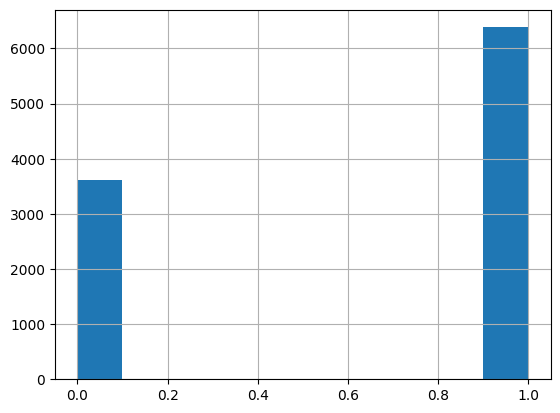

In [25]:
data['Zero Balance'].hist()

In [26]:
data.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             4204         4204    4204  4204    4204     4204   
      2             1695         1695    1695  1695    1695     1695   
1     0              413          413     413   413     413      413   
      1              810          810     810   810     810      810   
      2              814          814     814   814     814      814   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     4204             4204              4204   
      2                     1695             1695              1695   
1     0                      413              413               413   
      1                      810              810               810   
      2                      814              814               814   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      4204          4204  
      2                      1695          1695  
1     0                       413           413  
      1                       810           810  
      2                       814           814

In [27]:
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [28]:
x=data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary',  'Zero Balance']]

In [29]:
y=data['Churn']

In [30]:
data['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

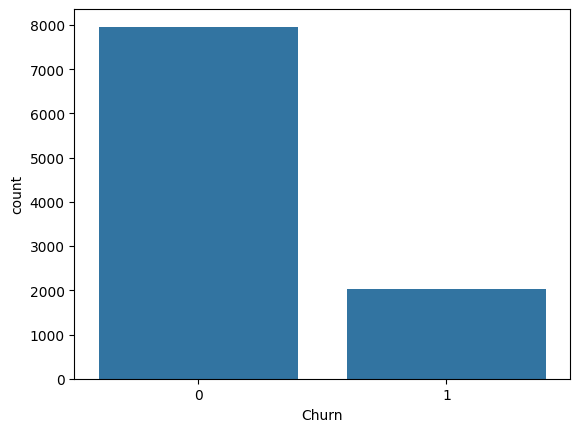

In [31]:
sp.countplot(x='Churn',data=data)

In [32]:
from imblearn.under_sampling import RandomUnderSampler

In [33]:
mod=RandomUnderSampler(random_state=2529)

In [34]:
x_mod,y_mod=mod.fit_resample(x,y)

In [35]:
x_mod.shape,y_mod.shape

((4074, 11), (4074,))

In [36]:
x.shape,y.shape

((10000, 11), (10000,))

In [37]:
x.value_counts()

CreditScore  Geography  Gender  Age  Tenure  Balance    Num Of Products  Has Credit Card  Is Active Member  Estimated Salary  Zero Balance
350          0          0       54   1       152677.48  0                1                1                 191973.49         1               1
695          0          1       34   9       0.00       1                1                1                 67502.12          0               1
                        0       39   4       65521.20   0                1                1                 1243.97           1               1
                                44   8       0.00       1                1                1                 70974.13          0               1
                                46   3       122549.64  0                1                1                 56297.85          1               1
                                                                                                                                             

In [38]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [39]:
x_mod.value_counts()

CreditScore  Geography  Gender  Age  Tenure  Balance    Num Of Products  Has Credit Card  Is Active Member  Estimated Salary  Zero Balance
350          0          0       54   1       152677.48  0                1                1                 191973.49         1               1
694          2          1       58   1       143212.22  0                0                0                 102628.56         1               1
693          2          1       41   9       181461.48  1                1                1                 187929.43         1               1
                                43   1       121927.92  0                1                0                 87994.95          1               1
694          0          0       57   8       116326.07  0                1                1                 117704.65         1               1
                                                                                                                                             

In [40]:
y_mod.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: >

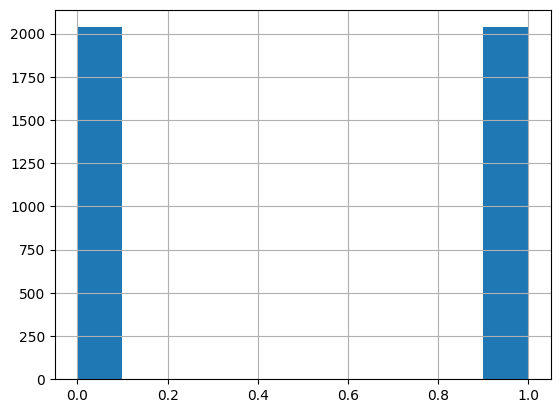

In [41]:
y_mod.hist()

In [42]:
from imblearn.over_sampling import RandomOverSampler

In [43]:
ros=RandomOverSampler(random_state=2529)
x_ros,y_ros=ros.fit_resample(x,y)

In [44]:
x_ros.shape,y_ros.shape

((15926, 11), (15926,))

<Axes: >

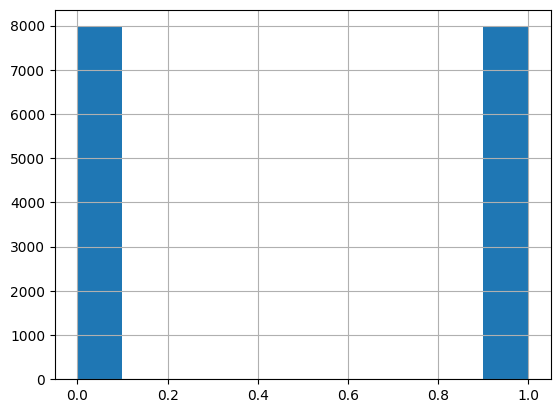

In [45]:
y_ros.hist()

<Axes: >

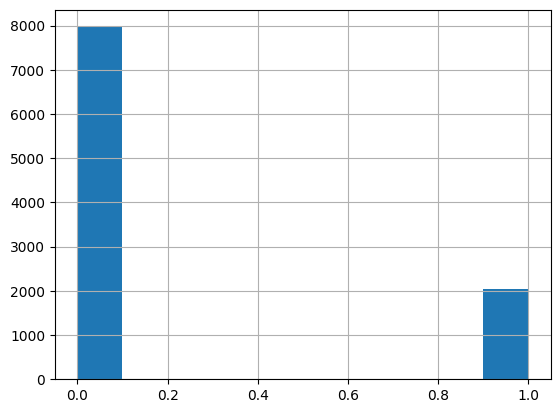

In [46]:
y.hist()

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2529)

In [49]:
x_mod_train,x_mod_test,y_mod_train,y_mod_test=train_test_split(x_mod,y_mod,random_state=2529)

In [50]:
x_ros_train,x_ros_test,y_ros_train,y_ros_test=train_test_split(x_ros,y_ros,random_state=2529)

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [59]:
x_train[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

In [60]:
x_test[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

In [62]:
x_mod_train[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_mod_train[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

In [63]:
x_mod_test[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_mod_test[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

In [64]:
x_ros_train[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_ros_train[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

In [66]:
from sklearn.svm import SVC
svc=SVC()

In [67]:
svc.fit(x_train,y_train)

SVC()

In [68]:
y_pred=svc.predict(x_test)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[1982,   30],
       [ 341,  147]])

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2012
           1       0.83      0.30      0.44       488

    accuracy                           0.85      2500
   macro avg       0.84      0.64      0.68      2500
weighted avg       0.85      0.85      0.82      2500



In [77]:
from sklearn.model_selection import GridSearchCV
grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01],'class_weight':['balanced']}

In [78]:
g=GridSearchCV(SVC(),grid,refit=True,verbose=2,cv=2)
g.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..............C=0.1, class_weight=balanced, gamma=1; total time=   1.8s
[CV] END ..............C=0.1, class_weight=balanced, gamma=1; total time=   1.8s
[CV] END ............C=0.1, class_weight=balanced, gamma=0.1; total time=   1.2s
[CV] END ............C=0.1, class_weight=balanced, gamma=0.1; total time=   1.2s
[CV] END ...........C=0.1, class_weight=balanced, gamma=0.01; total time=   1.4s
[CV] END ...........C=0.1, class_weight=balanced, gamma=0.01; total time=   1.6s
[CV] END ................C=1, class_weight=balanced, gamma=1; total time=   2.8s
[CV] END ................C=1, class_weight=balanced, gamma=1; total time=   1.8s
[CV] END ..............C=1, class_weight=balanced, gamma=0.1; total time=   1.1s
[CV] END ..............C=1, class_weight=balanced, gamma=0.1; total time=   1.2s
[CV] END .............C=1, class_weight=balanced, gamma=0.01; total time=   1.2s
[CV] END .............C=1, class_weight=balanced,

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01]},
             verbose=2)

In [79]:
print(g.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [80]:
grid_prediction=g.predict(x_test)

In [83]:
confusion_matrix(y_test,grid_prediction)

array([[1827,  185],
       [ 318,  170]])

In [84]:
print(classification_report(y_test,grid_prediction))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2012
           1       0.48      0.35      0.40       488

    accuracy                           0.80      2500
   macro avg       0.67      0.63      0.64      2500
weighted avg       0.78      0.80      0.79      2500



In [85]:
svc_mod=SVC()
svc_mod.fit(x_mod_train,y_mod_train)

SVC()

In [86]:
y_mod_pred=svc_mod.predict(x_mod_test)

In [87]:
confusion_matrix(y_mod_test,y_mod_pred)

array([[397, 126],
       [148, 348]])

In [88]:
print(classification_report(y_mod_test,y_mod_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       523
           1       0.73      0.70      0.72       496

    accuracy                           0.73      1019
   macro avg       0.73      0.73      0.73      1019
weighted avg       0.73      0.73      0.73      1019



In [99]:
param_grid={'C':[0.1,1,10],
      'gamma':[1,0.1,0.01],
      'kernel':['rbf'],
      'class_weight':['balanced']}

In [101]:
g_mod=GridSearchCV(SVC(),param_grid,refit=True,cv=2,verbose=2)
g_mod.fit(x_mod_train,y_mod_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [104]:
print(g_mod.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [105]:
g_mod_pred=g_mod.predict(x_mod_test)

In [106]:
confusion_matrix(y_mod_test,g_mod_pred)

array([[397, 126],
       [150, 346]])

In [107]:
print(classification_report(y_mod_test,g_mod_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       523
           1       0.73      0.70      0.71       496

    accuracy                           0.73      1019
   macro avg       0.73      0.73      0.73      1019
weighted avg       0.73      0.73      0.73      1019



In [120]:
svc_ros=SVC()
svc_ros.fit(x_ros_train,y_ros_train)

SVC()

In [121]:
y_ros_pred=svc_ros.predict(x_ros_test)

In [122]:
confusion_matrix(y_ros_test,y_ros_pred)

array([[   0, 1979],
       [   0, 2003]])

In [123]:
print(classification_report(y_ros_test,y_ros_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1979
           1       0.50      1.00      0.67      2003

    accuracy                           0.50      3982
   macro avg       0.25      0.50      0.33      3982
weighted avg       0.25      0.50      0.34      3982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
param_grid={'C':[0.1,1,10],
      'gamma':[1,0.1,0.01],
      'kernel':['rbf'],
      'class_weight':['balanced']}
g_ros=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)



In [126]:
g_ros.fit(x_ros_train,y_ros_train)



Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [127]:
print(g_ros.best_estimator_)


SVC(C=10, class_weight='balanced', gamma=1)


In [128]:
g_ros_pred=g_ros.predict(x_ros_test)
confusion_matrix(y_ros_test,g_ros_pred)


array([[1979,    0],
       [2003,    0]])

In [129]:
print(classification_report(y_ros_test,g_ros_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      1979
           1       0.00      0.00      0.00      2003

    accuracy                           0.50      3982
   macro avg       0.25      0.50      0.33      3982
weighted avg       0.25      0.50      0.33      3982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
